# Importing Libraries

### Libraries

In [1]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display            import Markdown

from sklearn.preprocessing      import LabelEncoder
from sklearn.ensemble           import RandomForestClassifier
from sklearn.linear_model       import LogisticRegression
from sklearn.neighbors          import KNeighborsClassifier
from sklearn.model_selection    import train_test_split, KFold
from sklearn.metrics            import roc_auc_score, accuracy_score


### Auxiliary Functions and Configurations

In [2]:
pd.options.display.float_format = '{:.2f}'.format
plt.style.use('ggplot')

def func_LabelEncoder(df):
    return LabelEncoder().fit_transform(df)

def df_informations(df):
    df_info = pd.DataFrame({'Not Null': df.notnull().count(),
                'Null': df.isnull().sum(),
                'Perce Null': df.isnull().sum() / len(df),
                'Dtype': df.dtypes,
                })

    df_dtype = pd.DataFrame(df_info['Dtype'].value_counts())
    df_dtype['Perce'] = round(df_dtype['Dtype'] / df_dtype['Dtype'].sum(), 2)

    text = f'Dataset has {df.shape[0]} rows and {df.shape[1]} columns. From these, we have:'

    df_info = df_info.style.background_gradient(cmap='jet', subset=['Perce Null']).format({'Perce Null': '{:.2%}'})
    df_dtype = df_dtype.style.background_gradient(cmap='YlGn', subset=['Perce']).format({'Perce': '{:.2%}'})

    display(Markdown("<H3 style='text-align:left;float:lfet;'>Information about the Dataset"))
    display(Markdown(f'<H5> {text}'))
    display(df_info)
    display(Markdown("<H3 style='text-align:left;float:lfet;'>About Dtypes we have:"))
    display(df_dtype)

# Data Understanding

## Collect  Initial Data

In [3]:
df = pd.read_csv('bank_customer_churn_prediction.csv')
df

customer_id  credit_score  country  gender  age  tenure   balance  \
0        15634602           619   France  Female   42       2      0.00   
1        15647311           608    Spain  Female   41       1  83807.86   
2        15619304           502   France  Female   42       8 159660.80   
3        15701354           699   France  Female   39       1      0.00   
4        15737888           850    Spain  Female   43       2 125510.82   
...           ...           ...      ...     ...  ...     ...       ...   
9995     15606229           771   France    Male   39       5      0.00   
9996     15569892           516   France    Male   35      10  57369.61   
9997     15584532           709   France  Female   36       7      0.00   
9998     15682355           772  Germany    Male   42       3  75075.31   
9999     15628319           792   France  Female   28       4 130142.79   

      products_number  credit_card  active_member  estimated_salary  churn  
0                   1            1              1         101348.88      1  
1                   1            0              1         112542.58      0  
2                   3            1              0         113931.57      1  
3                   2            0              0          93826.63      0  
4                   1            1              1          79084.10      0  
...               ...          ...            ...               ...    ...  
9995                2            1              0          96270.64      0  
9996                1            1              1         101699.77      0  
9997                1            0              1          42085.58      1  
9998                2            1              0          92888.52      1  
9999                1            1              0          38190.78      0  

[10000 rows x 12 columns]

## Describe Data

The dataset collected from Kaggle (https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset?resource=download).

- customer_id, <font color='red'>unused variable</font>.
- credit_score, <font color='chartreuse'>used as input</font>.
- country, <font color='chartreuse'>used as input</font>.
- gender, <font color='chartreuse'>used as input</font>.
- age, <font color='chartreuse'>used as input</font>.
- tenure, <font color='chartreuse'>used as input</font>.
- balance, <font color='chartreuse'>used as input</font>.
- products_number, <font color='chartreuse'>used as input</font>.
- credit_card, <font color='chartreuse'>used as input</font>.
- active_member, <font color='chartreuse'>used as input</font>.
- estimated_salary, <font color='chartreuse'>used as input</font>.
- churn, <font color='orange'>used as the target</font>. 1 if the client has left the bank during some period or 0 if he/she has not.

Dropping the customer_id column

In [4]:
df = df.drop(['customer_id'], axis=1)

Data Information

In [5]:
df_informations(df)

<H3 style='text-align:left;float:lfet;'>Information about the Dataset

<H5> Dataset has 10000 rows and 11 columns. From these, we have:

<H3 style='text-align:left;float:lfet;'>About Dtypes we have:

In [6]:
df.describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.99]).T

count      mean      std    min      1%      25%  \
credit_score     10000.00    650.53    96.65 350.00  432.00   584.00   
age              10000.00     38.92    10.49  18.00   21.00    32.00   
tenure           10000.00      5.01     2.89   0.00    0.00     3.00   
balance          10000.00  76485.89 62397.41   0.00    0.00     0.00   
products_number  10000.00      1.53     0.58   1.00    1.00     1.00   
credit_card      10000.00      0.71     0.46   0.00    0.00     0.00   
active_member    10000.00      0.52     0.50   0.00    0.00     0.00   
estimated_salary 10000.00 100090.24 57510.49  11.58 1842.83 51002.11   
churn            10000.00      0.20     0.40   0.00    0.00     0.00   

                       50%       75%       99%       max  
credit_score        652.00    718.00    850.00    850.00  
age                  37.00     44.00     72.00     92.00  
tenure                5.00      7.00     10.00     10.00  
balance           97198.54 127644.24 185967.99 250898.09  
products_number       1.00      2.00      3.00      4.00  
credit_card           1.00      1.00      1.00      1.00  
active_member         1.00      1.00      1.00      1.00  
estimated_salary 100193.91 149388.25 198069.73 199992.48  
churn                 0.00      0.00      1.00      1.00

## Explore Data

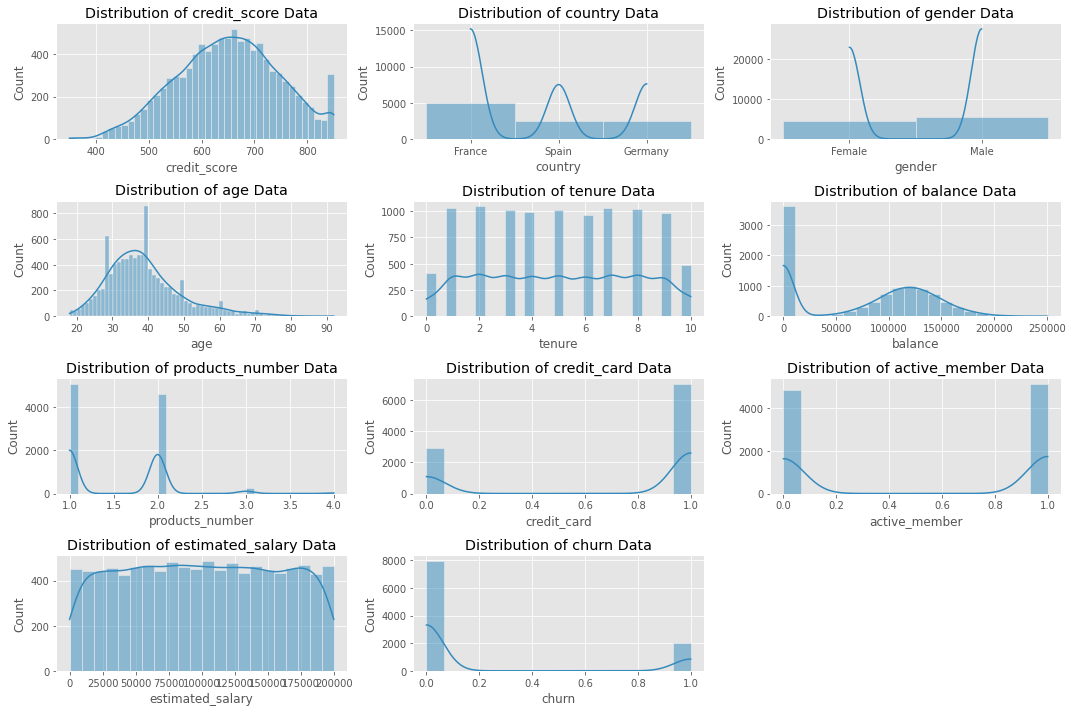

In [8]:
dicio_plot = {'credit_score':['Título', True]}
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns, 1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col], kde=True)
    plt.tight_layout()
    plt.plot()

In [9]:
fig = px.histogram(df, x="age", y="balance", color="churn",
                   marginal="box", # or violin, rug
                   hover_data=df.columns)

fig.show()

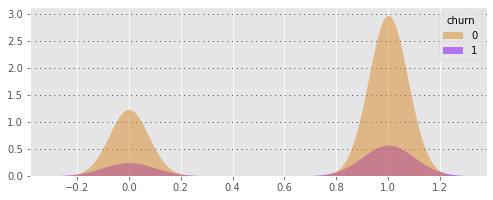

In [10]:
fig = plt.figure(figsize=(18,18))
gs = fig.add_gridspec(5,2)
axe0 = fig.add_subplot(gs[0,0])

axe0.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=axe0, data=df, x='credit_card',hue="churn", fill=True,palette=["#da8829", "#8000ff"], alpha=.5, linewidth=0)
axe0.set_xlabel("")
axe0.set_ylabel("");

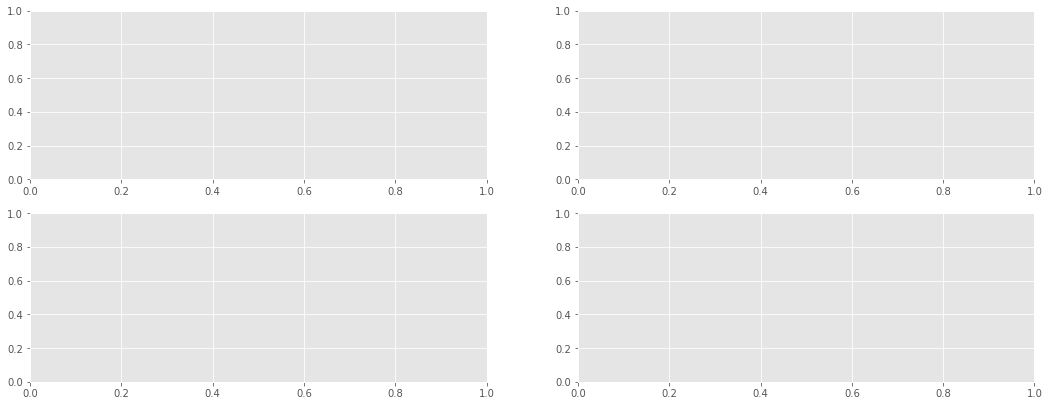

In [11]:
fig = plt.figure(figsize=(18,18))
axe0 = fig.add_subplot(gs[0,0])
axe1 = fig.add_subplot(gs[0,1])
axe2 = fig.add_subplot(gs[1,0])
axe3 = fig.add_subplot(gs[1,1])
plot = px.histogram(df, x="age", y="balance", color="churn",
                   marginal="box", # or violin, rug
                   hover_data=df.columns)

plot.show()

In [14]:
df['gender']

0       Female
1       Female
2       Female
3       Female
4       Female
         ...  
9995      Male
9996      Male
9997    Female
9998      Male
9999    Female
Name: gender, Length: 10000, dtype: object

In [15]:
df['gender'].value_counts()

Male      5457
Female    4543
Name: gender, dtype: int64

In [16]:
df['gender'] = func_LabelEncoder(df['gender'])

In [17]:
df['gender']

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    0
9998    1
9999    0
Name: gender, Length: 10000, dtype: int32

# Data Preparation

## Select Data

## Clean Data

## Construct Data

## Integrate Data

## Format Data

# Modeling

## Select Modeling Techniques

## Generate Test Design

## Build Model

## Assess Model

# Evaluation

## Evaluate Results

## Review Process

## Determine Next Steps

# Deployment

## Plan Deployment

## Plan Monitoring and Maintenance

## Produce Final Report

## Produce Final Report

## Review Project